# Example padre notebook for example-reduction-dir on Dropbox

The examples below show how to use the padre machinery. The initialization block below (between "####") is mandatory.

You must select "Cell|Run All" from the above menu to re-run the notebook , and wait for it to finish running.

This particular notebook is built for the example results directory that can be downloaded from Dropbox, use this link to download example-reduction-dir from Dropbox:
https://www.dropbox.com/sh/hde4azjdscsw20c/AAB2M0w3Ttm4ioPI0bccOPE-a?dl=0

Then do "cd example-reduction-dir; run-padre.sh" inside your copy of the results directory to start the notebook server and point your browser to the port indicated by the script.

In [1]:
### MANDATORY INIT ###
%matplotlib inline
from padre import DirList
dirs = DirList()
######################

In [2]:
# dirs is a directory list object
# By default displays all directories under your results directory 
# dirs.show() will have the same effect
dirs

#,name,# FITS,# img,# others,modified
0,.,10,0,2,11:14:08 May 11
1,plots-D147-LO-NOIFS-NOPOL-4M5S-spw0,3,13,0,10:18:23 May 11
2,plots-D147-LO-NOIFS-NOPOL-4M5S-spw0/D147-LO-NOIFS-NOPOL-4M5S-spw0-s11.diffgain-spw0.plots,0,0,0,10:18:23 May 11
3,plots-D147-LO-NOIFS-NOPOL-4M5S-spw0/D147-LO-NOIFS-NOPOL-4M5S-spw0-s4.diffgain-spw0.plots,0,25,0,10:28:55 May 11
4,plots-D147-LO-NOIFS-NOPOL-4M5S-spw0/D147-LO-NOIFS-NOPOL-4M5S-spw0-s7.diffgain-spw0.plots,0,25,0,10:18:21 May 11
5,plots-D147-LO-NOIFS-NOPOL-4M5S-spw0/D147-LO-NOIFS-NOPOL-4M5S-spw0-s8.diffgain-spw0.plots,0,25,0,10:18:17 May 11


In [3]:
dirs[0].files

#,name,ext,size,modified
0,cmd,,145,10:18:24 May 11
1,3C147-CD-LO-spw0-s7-lwimager.fullrest,.fits,128.6M,10:18:24 May 11
2,3C147-CD-LO-spw0-s9-lwimager.fullrest,.fits,64.6M,10:18:29 May 11
3,combined-4M5S-robust0_25,.fits,256.4M,10:18:13 May 11
4,combined-4M5S-robust0_5,.fits,256.5M,10:18:27 May 11
5,vla_L_xx_ampl,.fits,66.3M,10:18:27 May 11
6,vla_L_xx_im,.fits,66.3M,10:18:28 May 11
7,vla_L_xx_re,.fits,66.3M,10:18:30 May 11
8,vla_L_xy_ampl,.fits,66.3M,10:18:14 May 11
9,vla_L_xy_im,.fits,66.3M,10:18:30 May 11


In [4]:
dirs[0].fits  # gives list of FITS files in directory #0 above

#,name,ext,size,modified
0,3C147-CD-LO-spw0-s7-lwimager.fullrest,.fits,128.6M,10:18:24 May 11
1,3C147-CD-LO-spw0-s9-lwimager.fullrest,.fits,64.6M,10:18:29 May 11
2,combined-4M5S-robust0_25,.fits,256.4M,10:18:13 May 11
3,combined-4M5S-robust0_5,.fits,256.5M,10:18:27 May 11
4,vla_L_xx_ampl,.fits,66.3M,10:18:27 May 11
5,vla_L_xx_im,.fits,66.3M,10:18:28 May 11
6,vla_L_xx_re,.fits,66.3M,10:18:30 May 11
7,vla_L_xy_ampl,.fits,66.3M,10:18:14 May 11
8,vla_L_xy_im,.fits,66.3M,10:18:30 May 11
9,vla_L_xy_re,.fits,66.3M,10:18:28 May 11


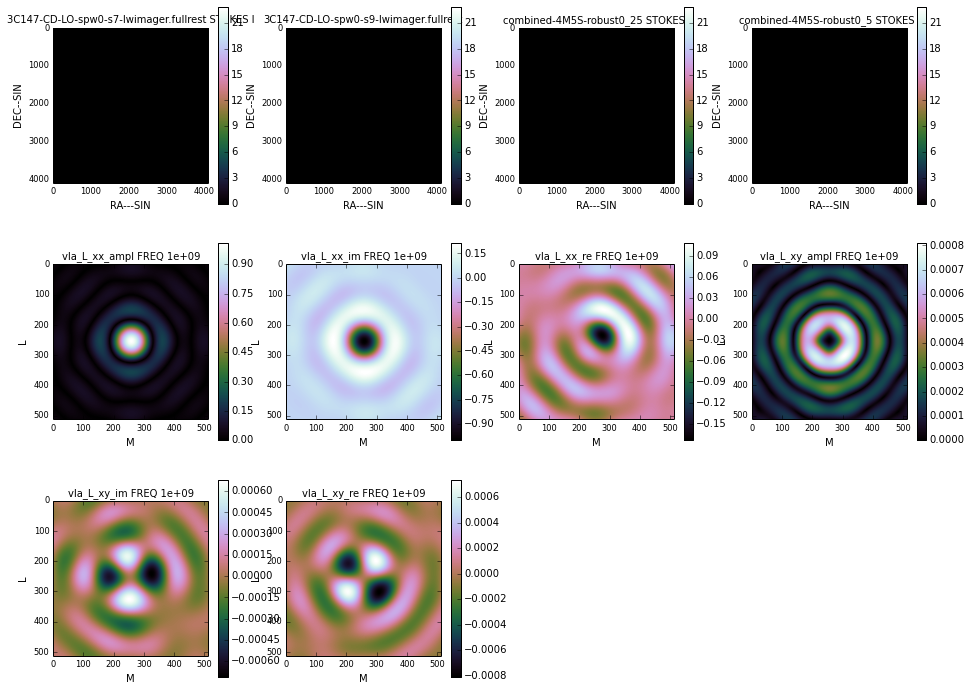

In [5]:
# displays thumbnails for all FITS files in directory #0
dirs[0].fits.thumbs()

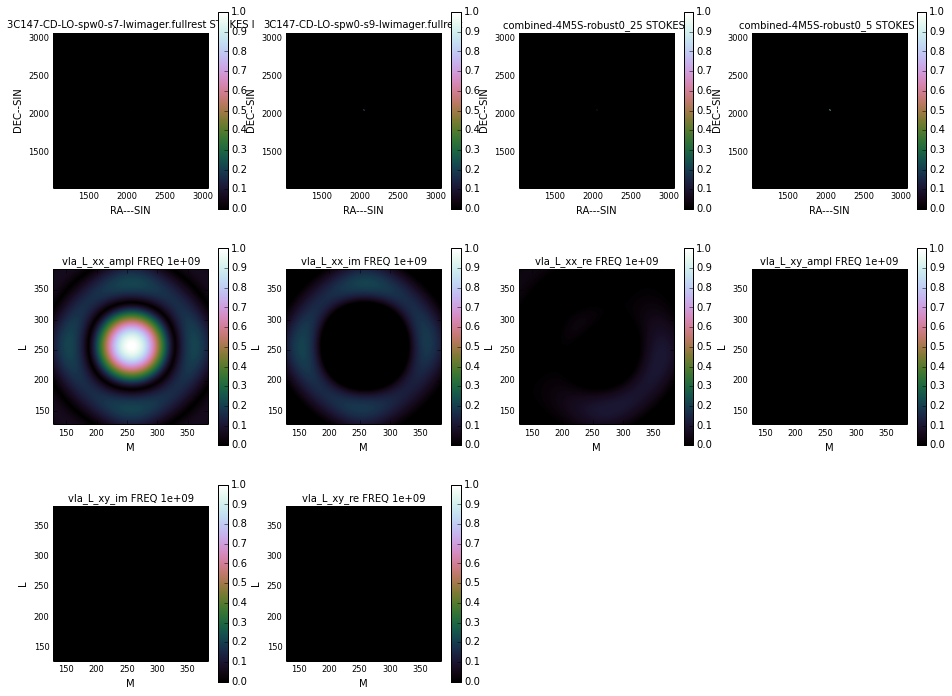

In [6]:
dirs[0].fits.thumbs(zoom=2,vmin=0,vmax=1)

In [7]:
# gives list of FITS files matching the pattern
dirs[0].fits("*s7*")

#,name,ext,size,modified
0,3C147-CD-LO-spw0-s7-lwimager.fullrest,.fits,128.6M,10:18:24 May 11


#,name,ext,size,modified
0,3C147-CD-LO-spw0-s7-lwimager.fullrest,.fits,128.6M,10:18:24 May 11


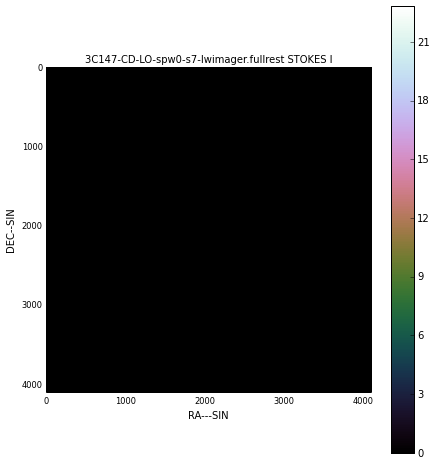

In [8]:
dirs[0].fits("*s7*").show()
dirs[0].fits("*s7*").thumbs()

In [9]:
# list of images (PNG, JPG, etc.) in directory #3
dirs[3].images.show(ncol=2)

#,name,ext,size,modified,#,name,ext,size,modified
0,dE-ampl-summary,.png,2.4M,10:18:18 May 11,13,dE-ant-22,.png,2.0M,10:18:17 May 11
1,dE-ant-1,.png,2.0M,10:18:17 May 11,14,dE-ant-23,.png,1.9M,10:18:17 May 11
2,dE-ant-10,.png,1.9M,10:18:18 May 11,15,dE-ant-24,.png,2.0M,10:18:17 May 11
3,dE-ant-11,.png,1.9M,10:18:17 May 11,16,dE-ant-25,.png,1.9M,10:18:17 May 11
4,dE-ant-12,.png,1.8M,10:18:18 May 11,17,dE-ant-26,.png,2.0M,10:18:17 May 11
5,dE-ant-13,.png,2.0M,10:18:18 May 11,18,dE-ant-27,.png,2.0M,10:18:17 May 11
6,dE-ant-14,.png,2.0M,10:18:17 May 11,19,dE-ant-28,.png,2.0M,10:18:17 May 11
7,dE-ant-16,.png,2.0M,10:18:17 May 11,20,dE-ant-3,.png,1.9M,10:18:17 May 11
8,dE-ant-17,.png,1.9M,10:18:18 May 11,21,dE-ant-5,.png,1.8M,10:18:17 May 11
9,dE-ant-18,.png,1.8M,10:18:17 May 11,22,dE-ant-6,.png,2.0M,10:18:17 May 11


In [10]:
# clickable thumbnails of same
dirs[3].images.thumbs(ncol=6)

'3C147-CD-LO-spw0-s7-lwimager.fullrest.fits (RA,DEC), unrolling STOKES'

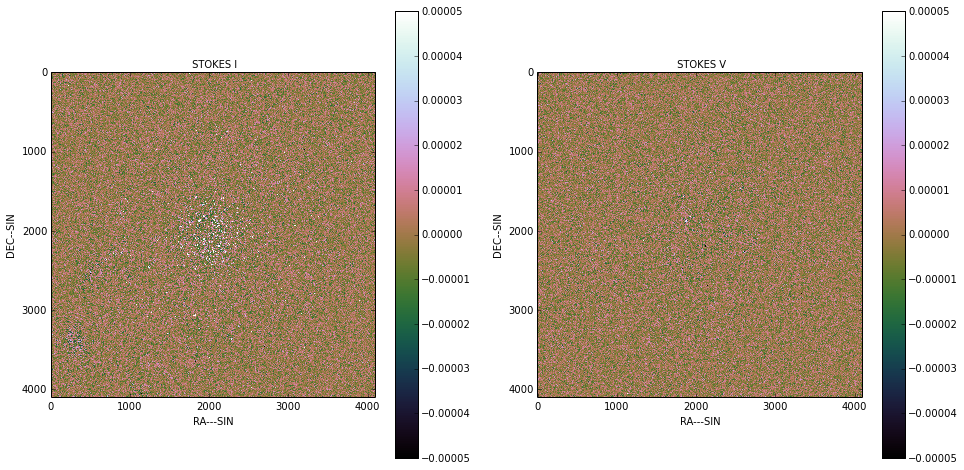

In [11]:
# first FITS file in directory #0. Stokes axis is unrolled by default, but this can be controlled by
# invoking dirs[0].fits[0].show() with some extra arguments
dirs[0].fits[0].show(vmin=-5e-5,vmax=5e-5)

'3C147-CD-LO-spw0-s7-lwimager.fullrest.fits (RA,DEC) zoom x4 STOKES I'

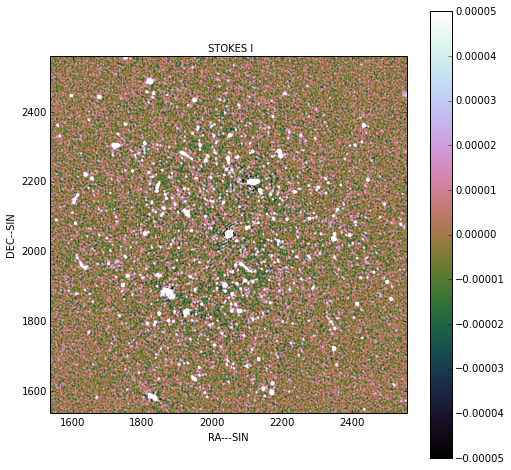

In [12]:
# and this shows how to invoke show() with some explicit arguments to control the rendering
dirs[0].fits[0].show(unroll=None,vmin=-5e-5,vmax=5e-5,zoom=4)

In [13]:
# just some info about the given file
dirs[0].fits[0].info()

3C147-CD-LO-spw0-s7-lwimager.fullrest.fits 4096x4096x2x1 RA---SIN,DEC--SIN,STOKES,FREQ


/usr/local/lib/python2.7/dist-packages/aplpy/labels.py:432: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if self.coord == x or self.axis.apl_tick_positions_world[ipos] > 0:


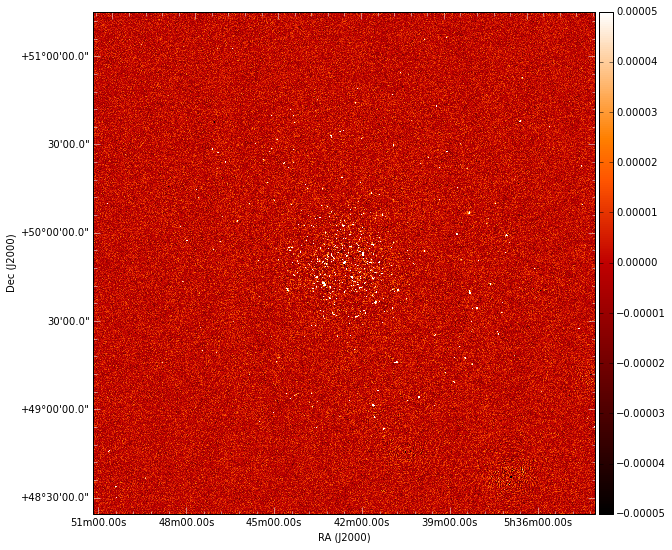

In [14]:
# A more elaborate rendering of the same file using aplpy. Note that .fullpath gives you the path to the file.
# aplpy is quite slow so we don't use it by default for all files, but this example shows you how to do
# a proper rendering
import aplpy
fig = aplpy.FITSFigure(dirs[0].fits[0].fullpath,slices=[0,0])
fig.show_colorscale(cmap='gist_heat',vmin=-5e-5,vmax=5e-5)
fig.add_colorbar()